# Adaptive Thresholding Testing

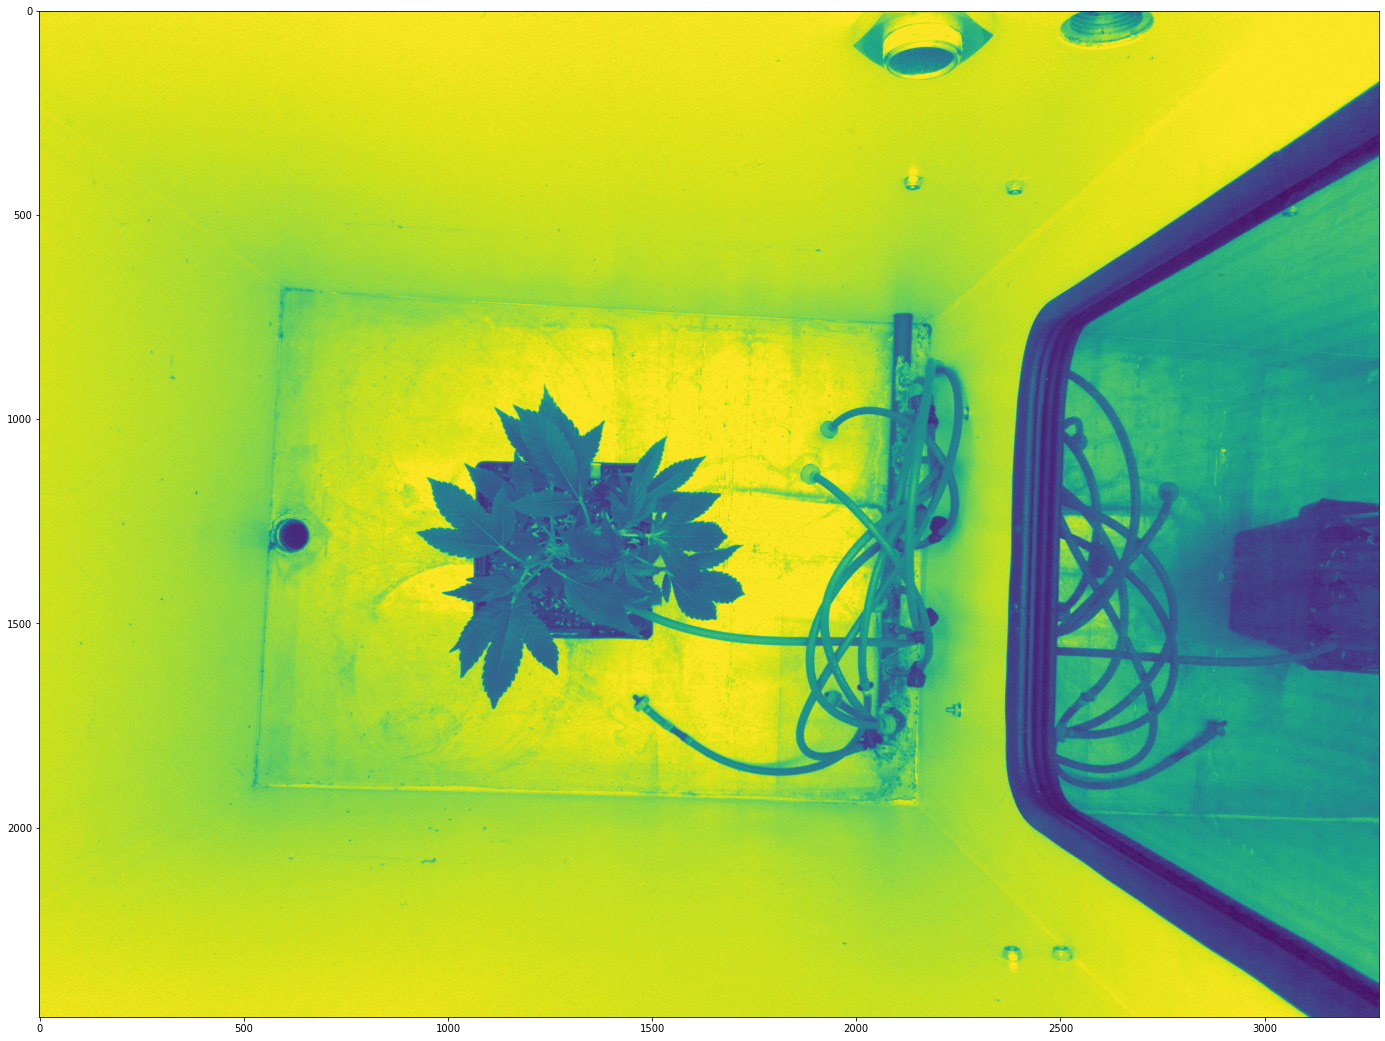

In [2]:
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot
from ipywidgets import interact

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 20]

os.chdir("F:/Pi12C")
image = cv.cvtColor(cv.imread("./1-18-2022 18_0.png"), cv.COLOR_BGR2HSV)
pyplot.imshow(image[:, :, 2])

## Filtering

In [7]:
(imageH, _, _) = cv.split(image)
def filter(imageH, minimum, maximum):
    imageH = cv.inRange(imageH, minimum, maximum)
    pyplot.imshow(imageH)

TraitError: Invalid selection: value not found

In [4]:
pixelCount = np.sum(imageH != 0)
print(pixelCount)

7875205


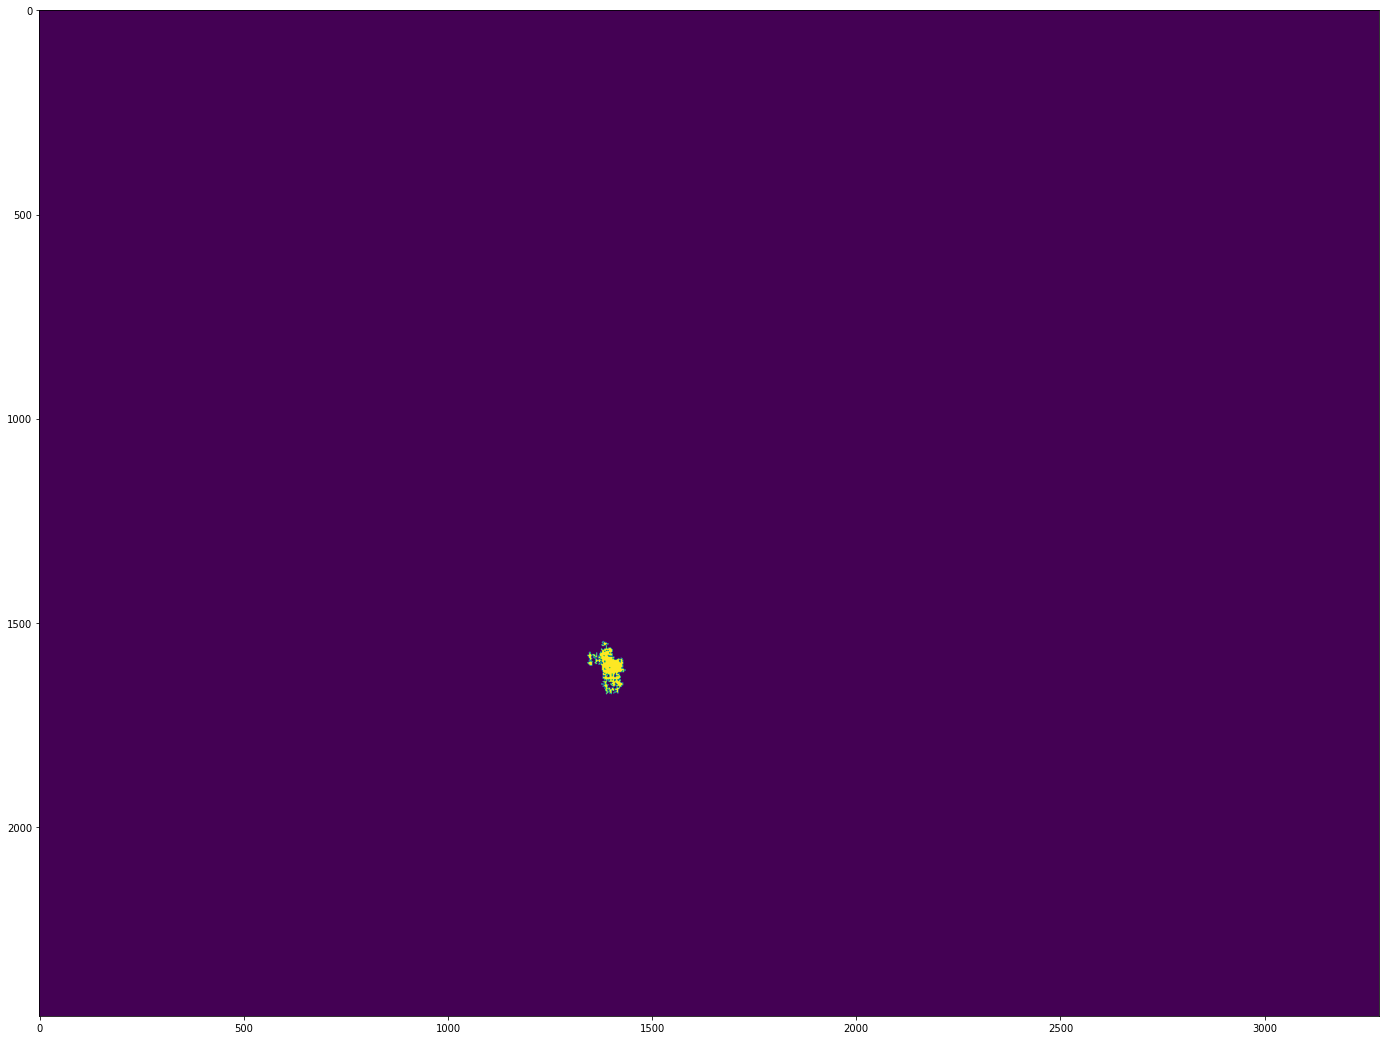

In [5]:
(_, elementLabels, elementStats, _) = cv.connectedComponentsWithStats(imageH, 8)
elementLabels = elementLabels[1:]
elementStats = elementStats[1:]
biggestElementLocation = np.where(elementStats[1:, 4] == max(elementStats[1:, 4]))[0][0] + 2
elementLabels[elementLabels != biggestElementLocation] = 0
elementLabels = elementLabels/biggestElementLocation
interestingPixels = np.sum(elementLabels != 0)
pyplot.imshow(elementLabels)

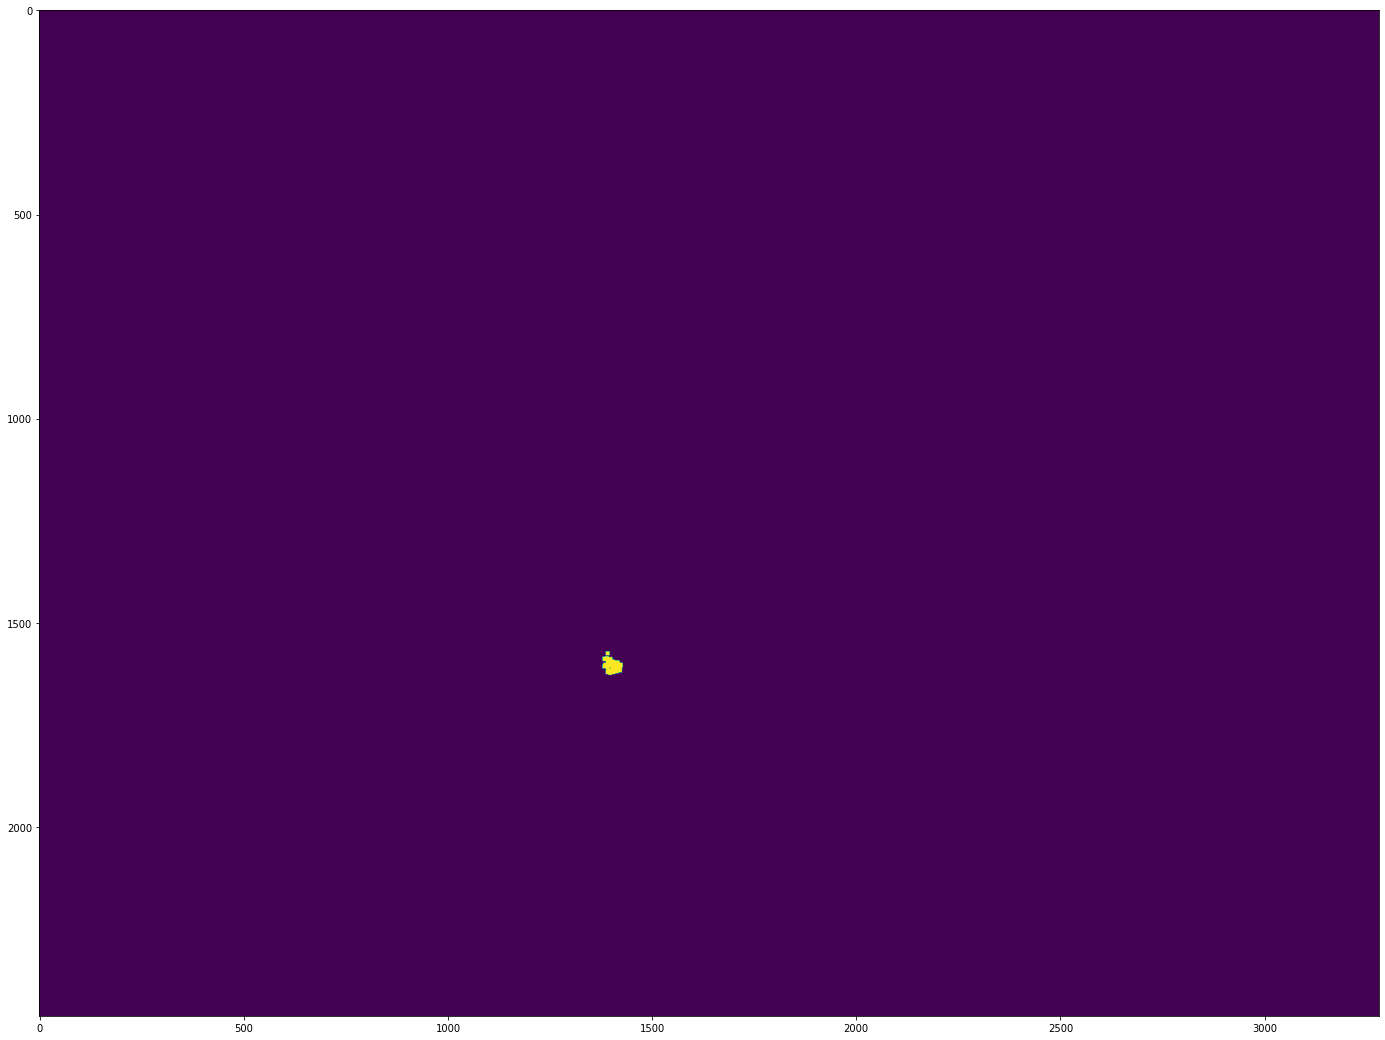

In [6]:
kernel = np.ones((10,10), np.uint8)
elementLabels = cv.dilate(cv.erode(elementLabels, kernel), kernel)
pyplot.imshow(elementLabels)